# Quality prediction of white wine

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [19]:
white_wine_original= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [20]:
white_wine=white_wine_original.copy()
white_wine_heatmap=white_wine_original.copy()

# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: '0low'
if value <= 5 else '1medium'
if value <= 7 else '2high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['0low', '1medium', '2high'])


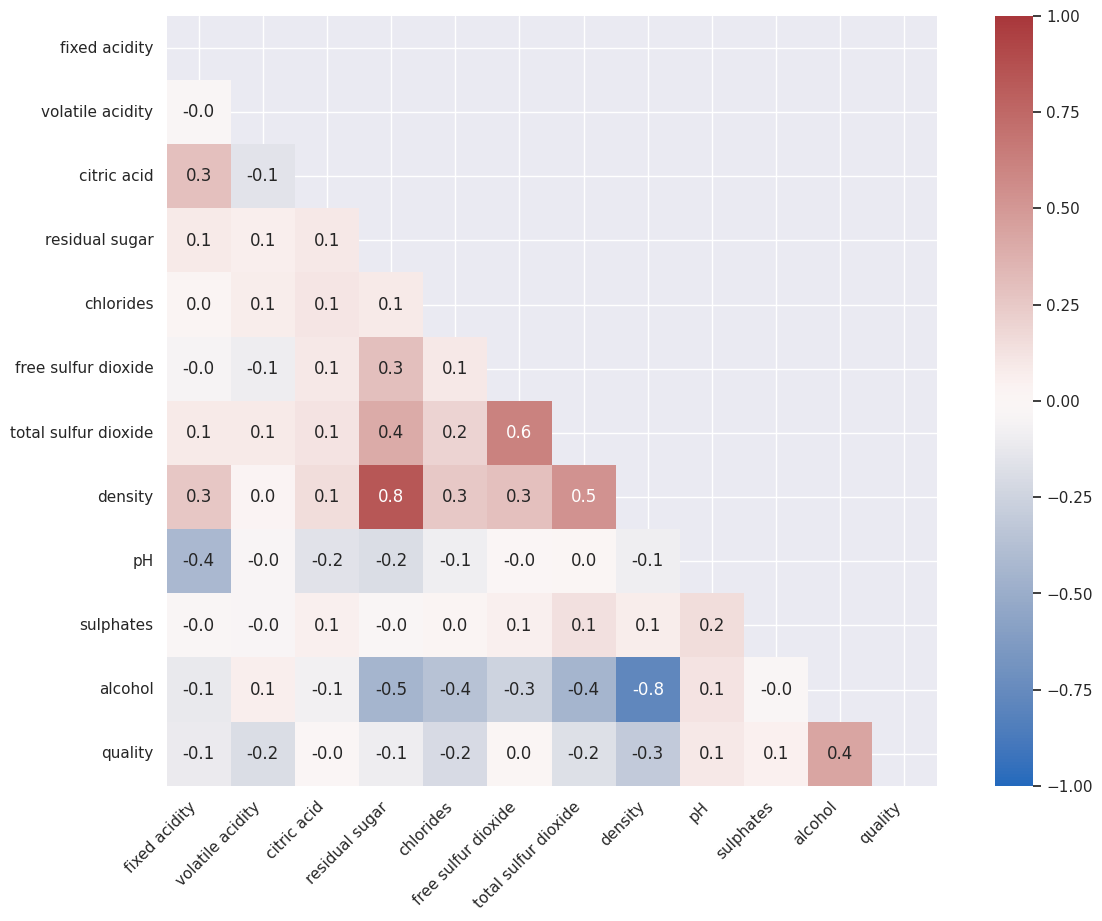

In [22]:
wines_mx=white_wine_heatmap.corr()


# creating mask
mask = np.triu(np.ones_like(wines_mx))


ax=sns.heatmap(
    wines_mx,
    annot=True,fmt=".1f",
    square=True,
    mask=mask,
    cmap='vlag',
    vmin = -1,
    vmax = 1
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc = {'figure.figsize':(15,10)})

In [23]:
from sklearn.preprocessing import LabelEncoder

#cheque for unique values in quality_label column

white_wine['quality_label'].unique()


le = LabelEncoder()


le.fit(white_wine[['quality_label']])

print(le.classes_)

df_transformed_quality=pd.DataFrame(le.transform(white_wine[['quality_label']]))

#print(df_transformed_quality)

enc_wines_ml=white_wine.copy()

#print(enc_wines_ml2['quality_label'])

#replace quality label with encoded values
enc_wines_ml['quality_label']=df_transformed_quality

le.inverse_transform([0,0, 1, 2])
le.transform(["0low", "0low", "1medium"])



enc_wines_ml.head()

['0low' '1medium' '2high']


/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1


In [24]:
enc_wines_ml=enc_wines_ml.drop(columns=['citric acid', 'total sulfur dioxide', 'quality', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'fixed acidity'])
enc_wines_ml.describe()

,volatile acidity,chlorides,alcohol,quality_label
count,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.274126,0.043510,10.514267,0.701919
std,0.087203,0.011295,1.230621,0.531776
min,0.080000,0.015000,8.000000,0.000000
25%,0.210000,0.036000,9.500000,0.000000
50%,0.260000,0.043000,10.400000,1.000000
75%,0.320000,0.050000,11.400000,1.000000
max,0.485000,0.071000,14.200000,2.000000


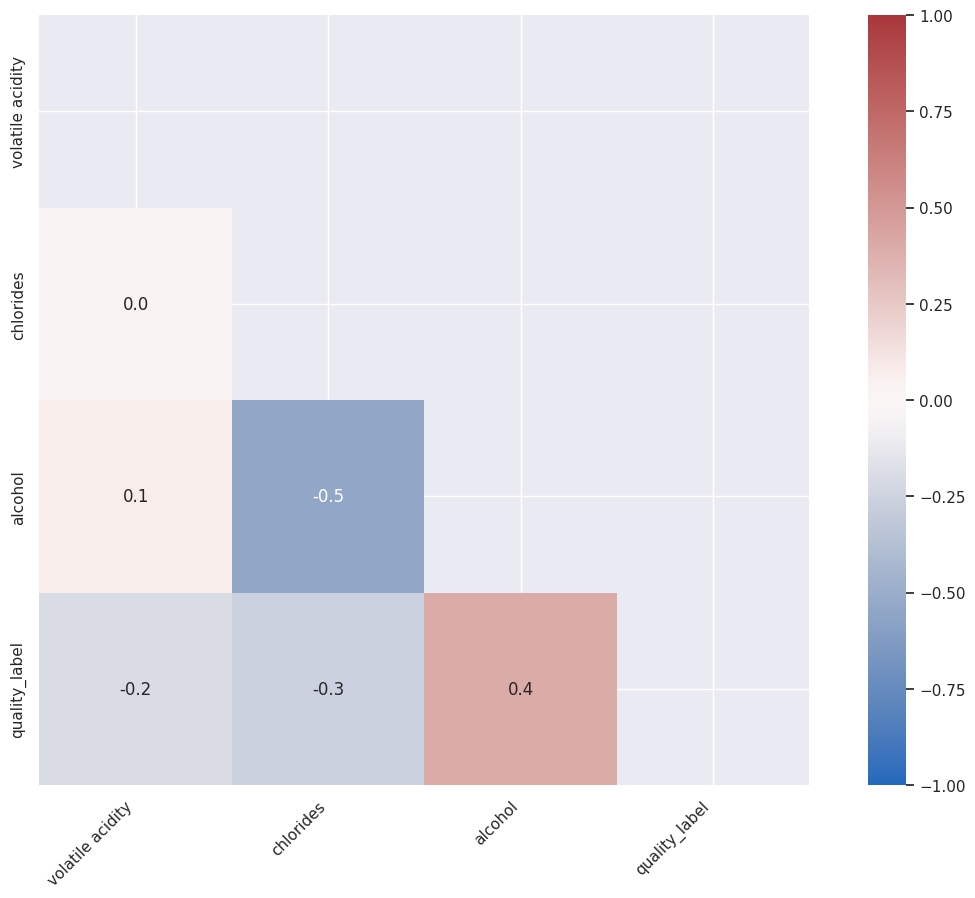

In [25]:
wines_mx=enc_wines_ml.corr()


# creating mask
mask = np.triu(np.ones_like(wines_mx))


ax=sns.heatmap(
    wines_mx,
    annot=True,fmt=".1f",
    square=True,
    mask=mask,
    cmap='vlag',
    vmin = -1,
    vmax = 1
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc = {'figure.figsize':(15,10)})

In [36]:
from sklearn.model_selection import train_test_split

X=enc_wines_ml.copy()


# Example:
y=enc_wines_ml[['quality_label']]
X.drop(['quality_label'],axis=1,inplace=True)


#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [37]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (3918, 3)
y_train (3918, 1)
X_test (980, 3)
y_test (980, 1)


In [38]:

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

def accuracy_compare(X_train, X_test, y_train, y_test):
    lr = LogisticRegression()
    lr.fit(X_train, y_train.values.ravel())
    pred_lr = lr.predict(X_test)
    print("\033[96m Logistic Regression: \033[0m", np.round(accuracy_score(y_test, pred_lr)*100, 2), '%')
    tree= DecisionTreeClassifier(max_depth=1, random_state=42)
    tree=tree.fit(X_train, y_train)
    pred_tree = tree.predict(X_test) 
    print("\033[96m Decision Tree Classifier: \033[0m", np.round(accuracy_score(y_test, pred_tree)*100, 2), '%')
    cla = AdaBoostClassifier(estimator=tree, n_estimators=100, random_state=42, learning_rate=0.5)
    cla.fit(X_train, y_train.values.ravel())
    pred_ada = cla.predict(X_test)
    print("\033[96m AdaBoost Classifier: \033[0m", np.round(accuracy_score(y_test, pred_ada)*100, 2), '%')
    clr = RandomForestClassifier(max_depth=2, random_state=0)
    clr.fit(X_train, y_train.values.ravel())
    pred_rnd = clr.predict(X_test)
    print("\033[96m Random Forest Classifier: \033[0m", np.round(accuracy_score(y_test, pred_rnd)*100, 2), '%')
    clf = SVC(kernel = 'linear').fit(X_train,y_train.values.ravel())
    clf.predict(X_train)
    pred_svc = clf.predict(X_test)
    print("\033[96m Support Vector classifier: \033[0m", np.round(accuracy_score(y_test, pred_svc)*100, 2), '%')

accuracy_compare(X_train, X_test, y_train, y_test)

 Logistic Regression:  70.82 %
 Decision Tree Classifier:  62.86 %
 AdaBoost Classifier:  70.51 %
 Random Forest Classifier:  70.2 %
 Support Vector classifier:  70.71 %


In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

def evaluate (y_test, pred_lr, target_names):
    print(" \033[95m \033[1m Confusion matrix: \033[0m")
    cm=confusion_matrix(y_test, pred_lr)
    print(cm, '\n\n')
    print("\033[95m \033[1m Accuracy score: \033[0m", np.round(accuracy_score(y_test, pred_lr)*100, 2), '%\n\n')
    print("\033[95m \033[1m Classification report: \033[0m \n",classification_report(y_test, pred_lr, target_names=target_names), '\n\n')
    kappa = cohen_kappa_score(pred_lr, y_test)
    print("\033[95m \033[1m Cohen-Kappa score: \033[0m", kappa)

In [41]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC

#training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

evaluate(y_test, y_pred,["0low","1medium", "2high"])

/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   Confusion matrix: 
[[166 162   0]
 [ 89 527   0]
 [  0  36   0]] 


  Accuracy score:  70.71 %


  Classification report:  
               precision    recall  f1-score   support

        0low       0.65      0.51      0.57       328
     1medium       0.73      0.86      0.79       616
       2high       0.00      0.00      0.00        36

    accuracy                           0.71       980
   macro avg       0.46      0.45      0.45       980
weighted avg       0.67      0.71      0.68       980
 


  Cohen-Kappa score:  0.3461502696671006


/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.linear_model import LogisticRegression


# Fit the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
pred_lr

evaluate(y_test, pred_lr,["0low","1medium", "2high"])

   Confusion matrix: 
[[170 158   0]
 [ 92 524   0]
 [  4  32   0]] 


  Accuracy score:  70.82 %


  Classification report:  
               precision    recall  f1-score   support

        0low       0.64      0.52      0.57       328
     1medium       0.73      0.85      0.79       616
       2high       0.00      0.00      0.00        36

    accuracy                           0.71       980
   macro avg       0.46      0.46      0.45       980
weighted avg       0.68      0.71      0.69       980
 


  Cohen-Kappa score:  0.35319203928663734


/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classifi